In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfx=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

In [3]:
dfx.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [4]:
df_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [5]:
x=dfx.values
X=x[:,:-1]
Y=x[:,-1]
X_test=df_test.values

# Normalise
X=(X-X.mean())/X.std()
X_test=(X_test-X_test.mean())/X_test.std()

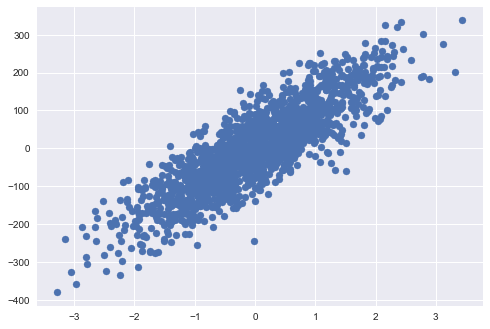

In [6]:
plt.style.use('seaborn')
plt.scatter(X[:,1],Y)
plt.show()

In [7]:
X=X[:,1]
X_test=X_test[:,1]

In [8]:
df_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [9]:
# replace zero by mean
X_test=[]
X_test.append(df_test['feature_2'])
    

In [10]:
X_test=np.array(X_test).reshape((-1,1))

In [11]:
X_test

array([[ 2.07620944e+00],
       [ 9.53184528e-01],
       [ 9.62991107e-01],
       [ 5.44801734e-01],
       [-8.33624211e-01],
       [-2.76118873e-01],
       [-1.06703493e+00],
       [ 1.22180716e+00],
       [ 1.50486389e+00],
       [ 1.18334885e+00],
       [-3.28367074e-01],
       [ 2.45295074e-01],
       [-3.85654827e-01],
       [ 9.29012258e-01],
       [-7.19747037e-02],
       [ 1.06708778e-01],
       [-2.11034778e+00],
       [ 2.06996750e-01],
       [ 8.19485028e-01],
       [ 7.44893982e-01],
       [ 6.56494665e-01],
       [-1.00128476e+00],
       [-7.33564908e-01],
       [-2.49285638e-01],
       [-3.79529024e-01],
       [ 4.20670861e-01],
       [-2.42462742e-01],
       [ 9.18856393e-01],
       [-6.42955729e-03],
       [-5.07093080e-01],
       [ 9.54570300e-01],
       [-1.05739041e+00],
       [ 1.50352331e+00],
       [-9.52275555e-01],
       [-2.42220319e+00],
       [ 5.16415706e-01],
       [-2.12288866e-01],
       [ 8.63637701e-01],
       [-2.9

In [12]:
X=X.reshape(-1,1)

In [13]:
X.shape,X_test.shape

((1600, 1), (400, 1))

In [14]:
Y=Y.reshape(-1,1)
Y.shape

(1600, 1)

In [15]:
X_test=(X_test-X_test.mean())/X_test.std()

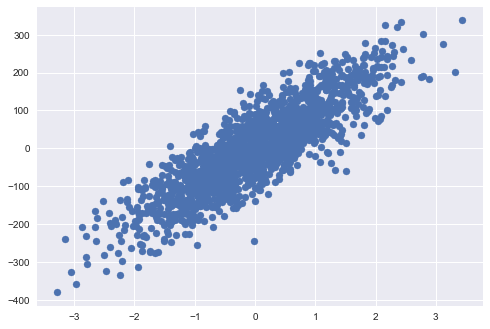

In [16]:
plt.scatter(X,Y)
plt.show()

In [17]:
# Inserting dummy variable
ones=np.ones((X.shape[0],1))
X=np.hstack((X,ones))
print(X.shape)
print(X[:4,])

(1600, 2)
[[-0.92093003  1.        ]
 [-0.16864243  1.        ]
 [ 0.15168305  1.        ]
 [ 0.16198536  1.        ]]


In [18]:
type(X_test)

numpy.ndarray

In [19]:
ones1=np.ones((X_test.shape[0],1))
X_test=np.hstack((X_test,ones1))
print(X_test.shape)
print(X_test[:4,])

(400, 2)
[[2.04744832 1.        ]
 [0.94676928 1.        ]
 [0.95638073 1.        ]
 [0.54651246 1.        ]]


In [20]:
# closed form algorithm
def predictions(X,theta):
    return np.dot(X,theta)

def getTheta_closedForm(X,Y):
    Y=np.mat(Y)
    firstPart=np.dot(X.T,X)
    secondPart=np.dot(X.T,Y)
    # using the linear algebra psudo inverse method
    theta=np.linalg.pinv(firstPart)*secondPart
    return theta

In [21]:
theta=getTheta_closedForm(X,Y)

In [27]:
Y_=predictions(X,theta)

In [28]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1 - num/denom)
    return score*100

In [31]:
r2_score(Y,np.array(Y_))

73.1633368433276

In [32]:
Y1_=predictions(X_test,theta)

In [33]:
df=pd.DataFrame(data=np.array(Y1_),columns=['target'])
df.to_csv('y_predictions.csv',index=True)